# Analysis of Log File

# 1.Importing packages and connecting to URL

In [43]:
import pandas as pd
import plotly.express as px
from util1 import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import  iplot

In [70]:
urlfirst = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log2"
urlsecond = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"
url = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log"
urls = [url,urlfirst,urlsecond]

In [71]:
df = html_to_df(urls,clean_empty=True)
df.head()

,1
0,"127.0.0.1 - - [15/Jan/2021:08:54:07 +0000] ""GE..."
1,"127.0.0.1 - - [15/Jan/2021:08:55:23 +0000] ""GE..."
2,"127.0.0.1 - - [15/Jan/2021:09:01:38 +0000] ""GE..."
3,"172.17.0.1 - - [15/Jan/2021:09:02:14 +0000] ""G..."
4,"172.17.0.1 - - [15/Jan/2021:09:02:15 +0000] ""G..."


In [72]:
columns = ["address","RFC931","User","date","gmt","action","status","size","referrer","browser"]
df = log_df(df,1,columns)

In [73]:
df.head()

,address,RFC931,User,date,gmt,action,status,size,referrer,browser
0,127.0.0.1,-,-,15/Jan/2021:08:54:07,+0000,GET /,403,4006,-,curl/7.61.1
1,127.0.0.1,-,-,15/Jan/2021:08:55:23,+0000,GET /cgi-bin/weakform.py,403,199,-,curl/7.61.1
2,127.0.0.1,-,-,15/Jan/2021:09:01:38,+0000,GET /cgi-bin/weak_form.py,200,19,-,curl/7.61.1
3,172.17.0.1,-,-,15/Jan/2021:09:02:14,+0000,GET /,403,4288,-,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...
4,172.17.0.1,-,-,15/Jan/2021:09:02:15,+0000,GET /noindex/common/css/bootstrap.min.css,200,99548,http://172.17.0.2/,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...


## 2.Checking XSS Attack

In [96]:
df['XSS_attack'] = df['action'].apply(XSS_finder)

In [97]:
df[df.XSS_attack == True].head(10)

,address,RFC931,User,date,gmt,action,status,size,referrer,browser,XSS_attack,country_code,latitude,longitude,alpha_3
754,172.17.0.1,-,-,15/Jan/2021:10:05:35,+0000,GET /cgi-bin/weak_form.py?fname=asdasd%3C%2Fp%...,200,355,http://172.17.0.2/cgi-bin/weak_form.py?fname=s...,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,True,Not found,Not found,Not found,Not found
757,172.17.0.1,-,-,16/Jan/2021:05:29:02,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,328,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
758,172.17.0.1,-,-,16/Jan/2021:05:30:04,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
759,172.17.0.1,-,-,16/Jan/2021:05:30:42,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
760,172.17.0.1,-,-,16/Jan/2021:05:30:57,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,341,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
761,172.17.0.1,-,-,16/Jan/2021:05:31:04,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
762,172.17.0.1,-,-,16/Jan/2021:05:31:24,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
763,172.17.0.1,-,-,16/Jan/2021:05:31:28,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
764,172.17.0.1,-,-,16/Jan/2021:05:31:34,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True,Not found,Not found,Not found,Not found
765,172.17.0.1,-,-,16/Jan/2021:05:32:02,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True,Not found,Not found,Not found,Not found


## 3.Getting Location data from User Address

In [98]:
keys = ['country_code', 'latitude', 'longitude', 'alpha_3']
df = add_location_data(df,'address',keys)
df.head()

,address,RFC931,User,date,gmt,action,status,size,referrer,browser,XSS_attack,country_code,latitude,longitude,alpha_3
0,127.0.0.1,-,-,15/Jan/2021:08:54:07,+0000,GET /,403,4006,-,curl/7.61.1,False,Not found,Not found,Not found,Not found
1,127.0.0.1,-,-,15/Jan/2021:08:55:23,+0000,GET /cgi-bin/weakform.py,403,199,-,curl/7.61.1,False,Not found,Not found,Not found,Not found
2,127.0.0.1,-,-,15/Jan/2021:09:01:38,+0000,GET /cgi-bin/weak_form.py,200,19,-,curl/7.61.1,False,Not found,Not found,Not found,Not found
3,172.17.0.1,-,-,15/Jan/2021:09:02:14,+0000,GET /,403,4288,-,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,Not found,Not found,Not found,Not found
4,172.17.0.1,-,-,15/Jan/2021:09:02:15,+0000,GET /noindex/common/css/bootstrap.min.css,200,99548,http://172.17.0.2/,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,Not found,Not found,Not found,Not found


# 4.Hits v/s Time graph

In [99]:
def plot(dt_series,title,xlabel,ylabel):
    fig = px.line( x=dt_series.unique(), y=dt_series.value_counts(sort = False))
    fig.update_layout(
        title=title,
         xaxis_title=xlabel,
        yaxis_title=ylabel)

    fig.show()

In [100]:
plot(dt_series[dt_series.apply(lambda x: x.year == 2004)],
                 "Hit v/s time year->2004",
                 "Time",
                 "Hits")

In [101]:
plot_hit_vs_time(dt_series[dt_series.apply(lambda x: x.year == 2021)],
                 "Hit v/s time->year 2021",
                 "Time",
                 "Hits")

# 5.OS/Device/Browsers used

In [102]:
def OS_devices_browsers(browser_series):
    operators = ['Windows','Mac','Linux','Other']
    res = {os:0 for os in operators}
    for browser in browser_series:
        count = 0
        for i in operators[:-1]:
            if i in browser:
                res[i]+=1
                count = 1
                break
        if count==0:
            res['Other']+=1
    return res

In [103]:
OS =OS_devices_browsers(df.browser)

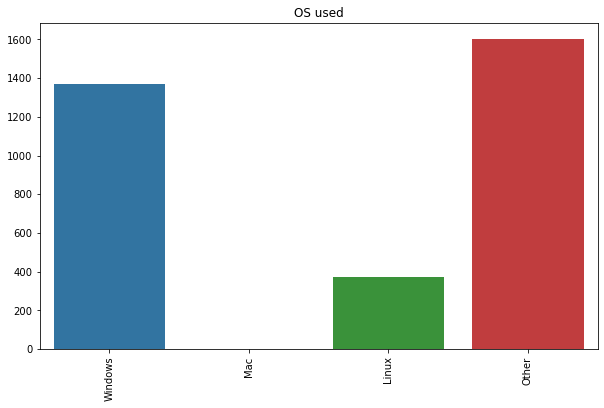

In [117]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(list(OS.keys()),list(OS.values()),)
plt.xticks(rotation=90)
plt.title('OS used')
plt.show()

In [114]:
def browsers(browser_series):
    brwsr = ['Firefox','Chrome','Opera','Other']
    res_dict = {o:0 for o in brwsr}
    for browser in browser_series:
        counter = 0
        for i in brwsr[:-1]:
            if i in browser:
                res_dict[i]+=1
                counter = 1
                break
        if counter==0:
            res_dict['Other']+=1
    return res_dict

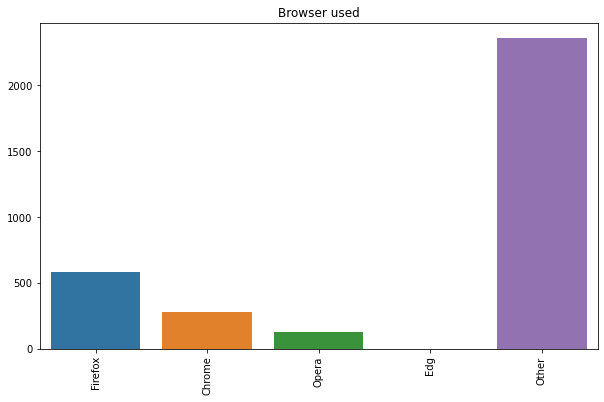

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(list(BRWSR.keys()),list(BRWSR.values()),)
plt.xticks(rotation=90)
plt.title('Browser used')
plt.show()